In [1]:
# Import required libraries
import sys
import os

# Add the src directory to path
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'src'))

from config import *
from models.dictionaries.table_master_dictionary import TableMasterDictionary
from datasets.table_dataset import PubTabNetDataset
from datasets.transforms.get_cells import GetCells
from datasets.transforms.load_tokens import LoadTokens
from datasets.transforms.table_resize import TableResize
from datasets.transforms.table_pad import TablePad
from datasets.transforms.bbox_encode import BboxEncode
from datasets.transforms.pack_inputs import PackInputs
from datasets.transforms.pad_data import PadData
from mmocr.utils import register_all_modules
register_all_modules()

from mmocr.registry import TRANSFORMS
print('LoadTokens' in TRANSFORMS.module_dict)
print('GetCells' in TRANSFORMS.module_dict)
print('TableResize' in TRANSFORMS.module_dict)
print('TablePad' in TRANSFORMS.module_dict)
print('PadData' in TRANSFORMS.module_dict)
print('TableBboxEncode' in TRANSFORMS.module_dict)
print('PackInputs' in TRANSFORMS.module_dict)
print(TRANSFORMS.module_dict.keys())

True
True
True
True
True
False
True
dict_keys(['GetCells', 'LoadTokens', 'MMDet2MMOCR', 'MMOCR2MMDet', 'PackTextDetInputs', 'PackTextRecogInputs', 'PackKIEInputs', 'LoadImageFromFile', 'LoadImageFromNDArray', 'InferencerLoader', 'LoadOCRAnnotations', 'LoadKIEAnnotations', 'ImgAugWrapper', 'TorchVisionWrapper', 'ConditionApply', 'RandomCrop', 'RandomRotate', 'Resize', 'RemoveIgnored', 'FixInvalidPolygon', 'BoundedScaleAspectJitter', 'RandomFlip', 'SourceImagePad', 'ShortScaleAspectJitter', 'TextDetRandomCropFlip', 'TextDetRandomCrop', 'PyramidRescale', 'RescaleToHeight', 'PadToWidth', 'TextRecogGeneralAug', 'CropHeight', 'ImageContentJitter', 'ReversePixels', 'TableResize', 'TablePad', 'BboxEncode', 'PackInputs', 'PadData'])


In [2]:
from mmocr.registry import DATASETS
from configs._etv_base import train_dataset
dataset = train_dataset.copy()
dataset['max_data'] = 100
dataset['pipeline'] = None
print(f"\n🔄 Loading Structure dataset...")
dataset = DATASETS.build(dataset)
print(f"✅ Structure dataset loaded successfully: {len(dataset)} samples")
print("✅ Structure dataset ready for use!")


🔄 Loading Structure dataset...
✅ Structure dataset loaded successfully: 100 samples
✅ Structure dataset ready for use!


In [3]:
def print_dict(d, indent=2):
    """Prints a dictionary in a readable format."""
    print(' ' * (indent - 2) + '{')
    for key, value in d.items():
        print(' ' * indent + f"{key}: ", end='')
        if isinstance(value, dict):
            print()
            print_dict(value, indent + 2)
        elif isinstance(value, list):
            if value and all(isinstance(item, dict) for item in value):
                print('[')
                for item in value:
                    print_dict(item, indent + 2)
                print(' ' * indent + ']')
            else:
                print(value)
        else:
            print(value)
    print(' ' * (indent - 2) + '}')

import random
print_dict(dataset[random.randint(0, len(dataset) - 1)])

{
  img_path: F:/data/vitabset/train\143596.png
  sample_idx: 65
  instances: [
  {
    tokens: ['<thead>', '<tr>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '</tr>', '</thead>', '<tbody>', '<tr>', '<td', ' rowspan="2"', '>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '</tr>', '<tr>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '</tr>', '<tr>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '</tr>', '<tr>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '</tr>', '</tbody>']
    type: structure
  }
  {
    tokens: ['N', 'ă', 'm']
    cell_id: 0
    type: content
    bbox: [7, 9, 58, 38]
  }
  {
    tokens: ['G', 'i', 'ả', 'i', ' ', 't', 'h', 'ư', 'ở', 'n', 'g']
    cell_id: 1
    type: content
    bbox: [220, 9, 334, 38]
  }
  {


In [4]:
from mmocr.registry import TRANSFORMS
from mmengine.dataset import Compose
from configs._etv_base import data_pipeline
pipeline = Compose(data_pipeline)


=== Step 1: LoadImageFromFile ===
Transform: LoadImageFromFile(ignore_empty=False, min_size=0, to_float32=False, color_type='color', imdecode_backend='cv2', backend_args=None)
Before: ['img_path', 'sample_idx', 'instances', 'img_info']
After: ['img_path', 'sample_idx', 'instances', 'img_info', 'img', 'img_shape', 'ori_shape']
Added: ['img', 'img_shape', 'ori_shape']
Image shape: (615, 1178, 3)


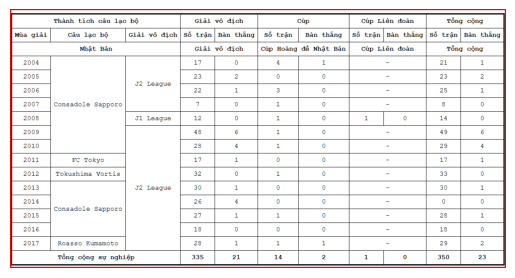


=== Step 2: LoadTokens ===
Transform: LoadTokens(with_structure=True, with_cell=False, max_structure_token_len=600, max_cell_token_len=600)
Before: ['img_path', 'sample_idx', 'instances', 'img_info', 'img', 'img_shape', 'ori_shape']
After: ['img_path', 'sample_idx', 'instances', 'img_info', 'img', 'img_shape', 'ori_shape', 'tokens', 'bboxes', 'masks']
Added: ['tokens', 'bboxes', 'masks']
Image shape: (615, 1178, 3)


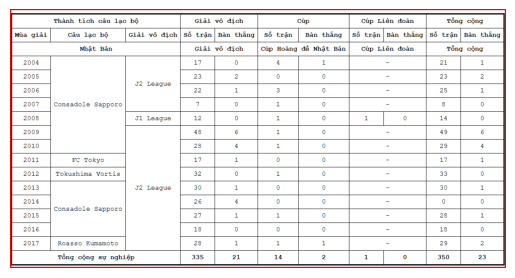


=== Step 3: TableResize ===
Transform: TableResize(min_size=None, long_size=480)
Before: ['img_path', 'sample_idx', 'instances', 'img_info', 'img', 'img_shape', 'ori_shape', 'tokens', 'bboxes', 'masks']
After: ['img_path', 'sample_idx', 'instances', 'img_info', 'img', 'img_shape', 'ori_shape', 'tokens', 'bboxes', 'masks', 'scale', 'scale_factor', 'keep_ratio']
Added: ['scale', 'scale_factor', 'keep_ratio']
Modified: ['img', 'img_shape']
Image shape: (250, 479, 3)


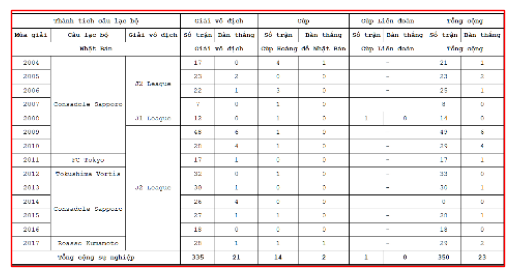


=== Step 4: TablePad ===
Transform: TablePad(size=(480, 480), size_divisor=None, pad_val={'img': 0, 'seg': 255}, pad_to_square=False, padding_mode='constant', return_mask=True, mask_ratio=(8, 8))
Before: ['img_path', 'sample_idx', 'instances', 'img_info', 'img', 'img_shape', 'ori_shape', 'tokens', 'bboxes', 'masks', 'scale', 'scale_factor', 'keep_ratio']
After: ['img_path', 'sample_idx', 'instances', 'img_info', 'img', 'img_shape', 'ori_shape', 'tokens', 'bboxes', 'masks', 'scale', 'scale_factor', 'keep_ratio', 'pad_shape', 'pad_fixed_size', 'pad_size_divisor', 'mask']
Added: ['pad_shape', 'pad_fixed_size', 'pad_size_divisor', 'mask']
Modified: ['img', 'img_shape']
Image shape: (480, 480, 3)


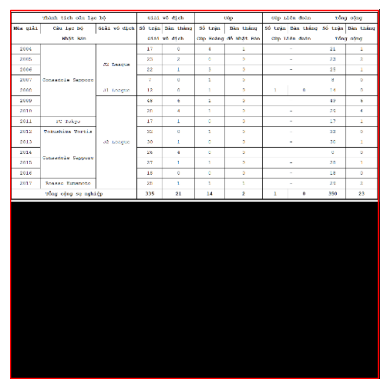

Mask shape: (60, 60, 1)

=== Step 5: PackInputs ===
Transform: PackInputs(keys=['img'], meta_keys=('bboxes', 'masks', 'filename', 'ori_shape', 'img_shape', 'scale_factor', 'ori_filename', 'pad_shape', 'valid_ratio'), mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
Before: ['img_path', 'sample_idx', 'instances', 'img_info', 'img', 'img_shape', 'ori_shape', 'tokens', 'bboxes', 'masks', 'scale', 'scale_factor', 'keep_ratio', 'pad_shape', 'pad_fixed_size', 'pad_size_divisor', 'mask']
After: ['inputs', 'data_samples']
Added: ['inputs', 'data_samples']
Removed: ['img_path', 'sample_idx', 'instances', 'img_info', 'img', 'img_shape', 'ori_shape', 'tokens', 'bboxes', 'masks', 'scale', 'scale_factor', 'keep_ratio', 'pad_shape', 'pad_fixed_size', 'pad_size_divisor', 'mask']
Data samples: <TableMasterDataSample(

    META INFORMATION
    img_shape: (480, 480)
    filename: None
    scale_factor: (0.4066213921901528, 0.4065040650406504)
    ori_shape: (615, 1178)
    img_norm_cfg: 
        mean: [0.5, 0

In [9]:
import numpy as np
import torch

def is_equal(a, b):
    if isinstance(a, (np.ndarray, torch.Tensor)) and isinstance(b, (np.ndarray, torch.Tensor)):
        if isinstance(a, torch.Tensor):
            return torch.equal(a, b)
        return np.array_equal(a, b)
    return a == b

sample = dataset[random.randint(0, len(dataset) - 1)].copy()
for i, transform in enumerate(pipeline.transforms):
    print(f"\n=== Step {i+1}: {transform.__class__.__name__} ===")
    print(f"Transform: {transform}")
    print(f"Before: {list(sample.keys())}")
    old_sample = sample.copy()
    sample = transform(sample)
    added = {k: v for k, v in sample.items() if k not in old_sample}
    modified = {k: v for k, v in sample.items() if k in old_sample and not is_equal(old_sample[k], v)}
    removed = {k:v for k,v in old_sample.items() if k not in sample}
    print(f"After: {list(sample.keys())}")
    if added: print(f"Added: {list(added.keys())}")
    if modified: print(f"Modified: {list(modified.keys())}")
    if removed: print(f"Removed: {list(removed.keys())}")
    if not added and not modified and not removed: 
        print("No changes made by the transform.")
    # print_dict(sample, indent=2)
    
    # Hiển thị thông tin chi tiết
    if 'img' in sample:
        print(f"Image shape: {sample['img'].shape}")
        import matplotlib.pyplot as plt

        plt.imshow(sample['img'])
        import matplotlib.patches as patches
        ax = plt.gca()
        rect = patches.Rectangle((0, 0), sample['img'].shape[1]-2, sample['img'].shape[0]-2, linewidth=1, edgecolor='red', facecolor='none')
        ax.add_patch(rect)
        plt.axis('off')
        plt.show()

    if 'mask' in sample:
        print(f"Mask shape: {sample['mask'].shape}")

    if 'data_samples' in sample:
        print(f"Data samples: {sample['data_samples']}")